In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
donnees_manuelles=pd.read_csv("/content/temoin_2_automatique.csv")

In [ ]:
print(donnees_manuelles.columns)

Index(['chunk_text', 'manuelle', 'compound_score'], dtype='object')


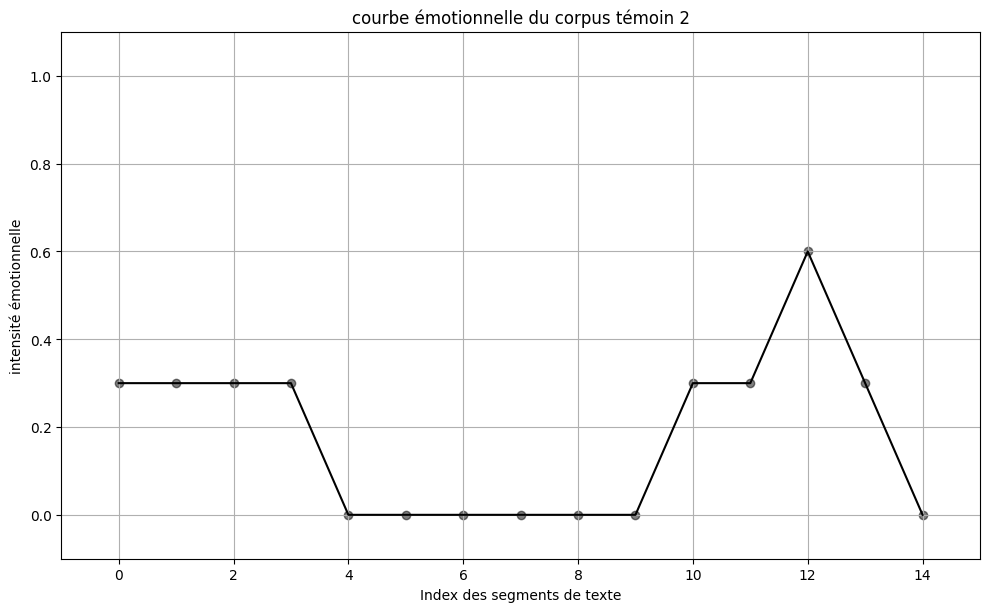

In [ ]:


# Convertir les valeurs en type float
donnees_manuelles['manuelle'] = donnees_manuelles['manuelle'].astype(float)

# Création du graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Utiliser l'index comme valeurs d'abscisse
plt.scatter(donnees_manuelles.index, donnees_manuelles['manuelle'], color='black', alpha=0.5)  # Graphique de dispersion
plt.plot(donnees_manuelles.index, donnees_manuelles['manuelle'], color='black')  # Ajouter une ligne reliant les points

plt.xlabel("Index des segments de texte")  # Étiquette de l'axe des abscisses
plt.ylabel("intensité émotionnelle")  # Étiquette de l'axe des ordonnées

# Ajouter de la marge au niveau de l'axe des ordonnées
plt.ylim(donnees_manuelles['manuelle'].min() - 0.1, donnees_manuelles['manuelle'].max() + 0.5)

# Définir les limites de l'axe des abscisses pour afficher toutes les valeurs possibles
plt.xlim(donnees_manuelles.index.min() - 1, donnees_manuelles.index.max() + 1)

plt.grid(True)  # Activer la grille
plt.tight_layout()  # Ajuster la mise en page pour éviter les coupures
plt.title("courbe émotionnelle du corpus témoin 2")
plt.show()  # Afficher le graphique

In [ ]:
#j'avais parfois bêtement annoté les scores manuels avec des virgules au lieu de points, et les valeurs n'étaient pas manipulables. J'ai donc converti les virgules en points.
donnees_manuelles['manuel'] = donnees_manuelles['manuel'].str.replace(',', '.')

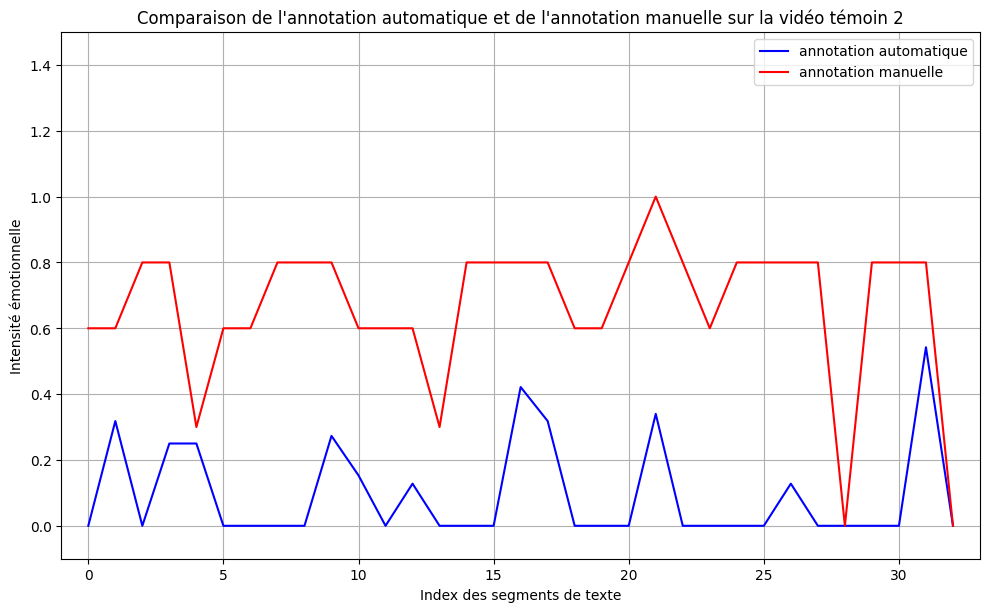

In [ ]:

# Prendre la valeur absolue des scores composés
donnees_manuelles['compound_score'] = donnees_manuelles['compound_score'].abs()

# Création du graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Utiliser l'index comme valeurs d'abscisse pour les deux séries de données
plt.plot(donnees_manuelles.index, donnees_manuelles['compound_score'], color='blue', label='Score composé')  # Ajouter une ligne reliant les points pour 'compound_score'

# Ajouter la courbe pour la colonne 'manuel', après conversion et nettoyage
donnees_manuelles['manuel'] = pd.to_numeric(donnees_manuelles['manuel'], errors='coerce')
donnees_manuelles.dropna(subset=['manuel'], inplace=True)
plt.plot(donnees_manuelles.index, donnees_manuelles['manuel'], color='red', label='Valeurs manuelles')  # Ligne pour 'manuel'


plt.xlabel("Index des segments de texte")  # Étiquette de l'axe des abscisses
plt.ylabel("Intensité émotionnelle")  # Étiquette de l'axe des ordonnées

# Ajouter de la marge au niveau de l'axe des ordonnées
plt.ylim(min(donnees_manuelles['compound_score'].min(), donnees_manuelles['manuel'].min()) - 0.1,
         max(donnees_manuelles['compound_score'].max(), donnees_manuelles['manuel'].max()) + 0.5)

# Définir les limites de l'axe des abscisses pour afficher toutes les valeurs possibles
plt.xlim(donnees_manuelles.index.min() - 1, donnees_manuelles.index.max() + 1)

plt.grid(True)  # Activer la grille
plt.tight_layout()  # Ajuster la mise en page pour éviter les coupures

# Ajouter une légende personnalisée
plt.legend(['annotation automatique', 'annotation manuelle'])  # Ici, vous pouvez personnaliser les étiquettes

# Ajouter un titre au graphique
plt.title("Comparaison de l'annotation automatique et de l'annotation manuelle sur la vidéo témoin 2")

plt.show()  # Afficher le graphique


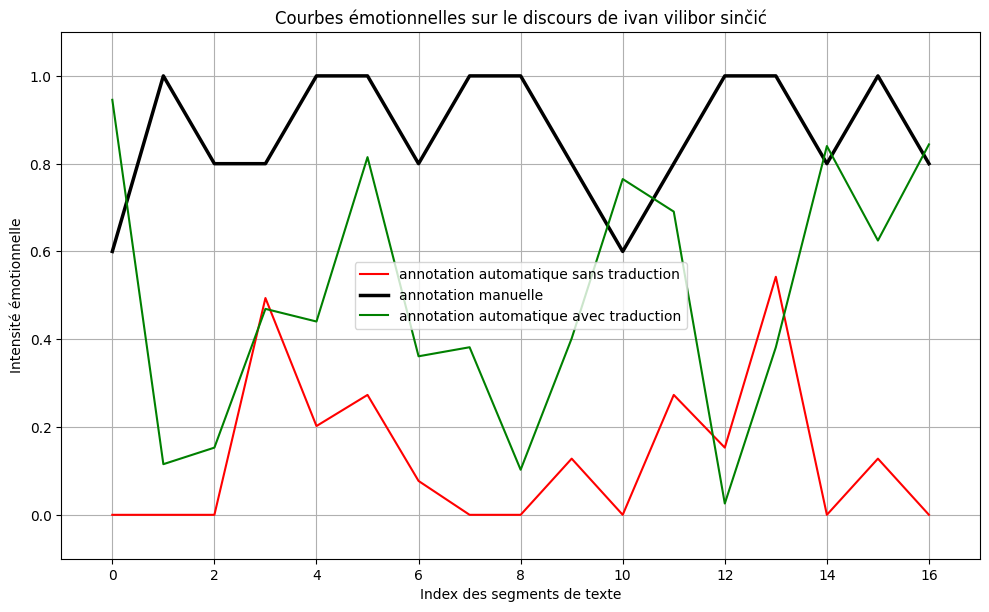

In [ ]:
# Prendre la valeur absolue des scores composés
donnees_manuelles['compound_score'] = donnees_manuelles['compound_score'].abs()

# Création du graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Utiliser l'index comme valeurs d'abscisse pour les trois séries de données
plt.plot(donnees_manuelles.index, donnees_manuelles['compound_score'], color='red', label='Score composé')  # Ligne pour 'compound_score'

# Ajouter la courbe pour la colonne 'manuel', après conversion et nettoyage
donnees_manuelles['manuelle'] = pd.to_numeric(donnees_manuelles['manuelle'], errors='coerce')
donnees_manuelles.dropna(subset=['manuelle'], inplace=True)
plt.plot(donnees_manuelles.index, donnees_manuelles['manuelle'], color='black', linewidth=2.5, label='Valeurs manuelles')  # Ligne pour 'manuel'

# Ajouter la courbe pour la colonne 'compound_score_trad', après conversion et nettoyage si nécessaire
donnees_manuelles['compound_score_trad'] = pd.to_numeric(donnees_manuelles['compound_score_trad'], errors='coerce')
donnees_manuelles.dropna(subset=['compound_score_trad'], inplace=True)
donnees_manuelles['compound_score_trad'] = donnees_manuelles['compound_score_trad'].abs()
plt.plot(donnees_manuelles.index, donnees_manuelles['compound_score_trad'], color='green', label='Score composé traduit')  # Ligne pour 'compound_score_trad'

plt.xlabel("Index des segments de texte")  # Étiquette de l'axe des abscisses
plt.ylabel("Intensité émotionnelle")  # Étiquette de l'axe des ordonnées

# Ajouter de la marge au niveau de l'axe des ordonnées
plt.ylim(min(donnees_manuelles['compound_score'].min(), donnees_manuelles['manuelle'].min(), donnees_manuelles['compound_score_trad'].min()) - 0.1,
         max(donnees_manuelles['compound_score'].max(), donnees_manuelles['manuelle'].max(), donnees_manuelles['compound_score_trad'].max()) + 0.1)

# Définir les limites de l'axe des abscisses pour afficher toutes les valeurs possibles
plt.xlim(donnees_manuelles.index.min() - 1, donnees_manuelles.index.max() + 1)

plt.grid(True)  # Activer la grille
plt.tight_layout()  # Ajuster la mise en page pour éviter les coupures

# Ajouter une légende personnalisée
plt.legend(['annotation automatique sans traduction', 'annotation manuelle', 'annotation automatique avec traduction'])  # Ici, vous pouvez personnaliser les étiquettes

# Ajouter un titre au graphique
plt.title("Courbes émotionnelles sur le discours de ivan vilibor sinčić")

plt.show()  # Afficher le graphique
